# Data Preprocessing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import cross_validation, metrics
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import random
import datetime

//anaconda/envs/nanodegree/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/envs/nanodegree/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/nanodegree/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.

In [2]:
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

In [3]:
pd.options.display.max_columns
np.set_printoptions(edgeitems=20)

In [4]:
print train_ds.shape
print test_ds.shape
n_train = train_ds.shape[0]
n_test = test_ds.shape[0]

(188318, 132)
(125546, 131)


In [5]:
train_ds.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
train_ds.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


Now that we have Loaded the data, let's take a look at the distribution.  We will take the log loss to get a cleaner distribution.

[(4, 12)]

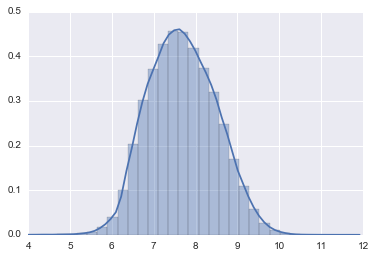

In [7]:
nl_losses = np.array(train_ds['loss'])
losses = np.log(nl_losses)
hist = sns.distplot(losses)
hist.set(xlim=(4,12))

There a a few outliers and a large percentage of the data is less than losses of 20,000

In [8]:
threshold = 20000
print len(train_ds[train_ds.loss>threshold])
print len(train_ds[train_ds.loss>threshold])/float(train_ds.shape[0])

438
0.0023258530783


In [9]:
print train_ds.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

In [10]:
correlations = train_ds.select_dtypes(include=['float64']).corr()
print correlations

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.

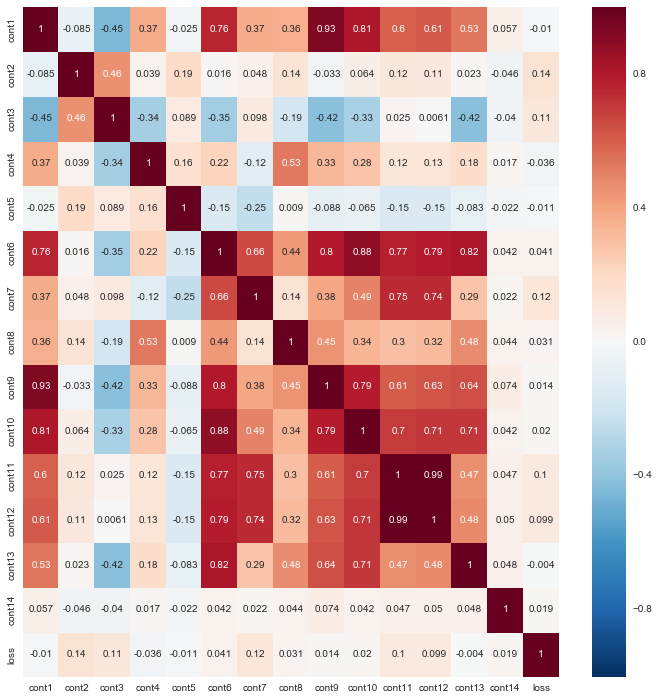

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations, annot=True)

The loss does not seem to be heavily correlated with any continuous variable.  There are a number of categorical variables and a smaller number of continuous variables.  We will change the categorical variables into standardized variables now.  We need to combine the train and test sets to do this, or else the pandas factorize() method will produce different numerical values for the same categories in the two data sets.

In [12]:
train_ds.drop(['id', 'loss'], axis=1, inplace=True)
test_ds.drop(['id'], axis=1, inplace=True)

cols = train_ds.columns
comb_ds = pd.concat((train_ds, test_ds)).reset_index(drop=True)
cat_cols  = [col for col in cols if 'cat' in col]

try:
    for cat_col in cat_cols:
        comb_ds[cat_col] = pd.factorize(comb_ds[cat_col])[0]
except ValueError,e:
    print ValueError, e, cat_col

train_ds = comb_ds.iloc[:n_train,:]
test_ds = comb_ds.iloc[n_train:,:]

In [13]:
train_arr = np.array(train_ds)
test_arr = np.array(test_ds)

n_folds = 4
kf = KFold(n_train, n_folds = n_folds, shuffle=True, random_state=442)
kf_arr = list()

for i in range(4):
    kf_arr.append(KFold(n_train, n_folds = n_folds, shuffle=True, random_state=442+i**3))

# Training

In [37]:
# Credit to https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867 for the following two wrapper class ideas

class XGBoostWrapper(object):
    """ This is a wrapper class to an xgboost object. 
    It will be used to train on datasets and predict.
    """
    
    def __init__(self, params, seed = 332):
        params['random_state'] = seed
        self.params = params
        self.seed = seed
        
    def train(self, X, Y, num_rounds=130):
        train_data = xgb.DMatrix(X, label = Y)
        self.model = xgb.train(self.params, train_data, num_rounds)
    
    def predict(self, X):
        return self.model.predict(xgb.DMatrix(X))

class SKLearnWrapper(object):
    """ This is a wrapper class for sklearn regressors. 
    The methods are standardized to be the same as the XGBoostWRapper methods.
    """
    
    def __init__(self, clf, params, seed = 232):
        params['random_state'] = seed
        self.clf = clf(**params)
        self.params = params
    
    def train(self, X, Y):
        self.clf.fit(X,Y)
    
    def predict(self, X):
        return self.clf.predict(X) 

def get_activations(clf):
    """ This is a function to get the training set and testing set predictions.
    There are n_folds number of test dataset predictions made, which are summed together later.
    We use KFold validation methods to make predictions on the entire training set (from n_fold segements)
    """
    
    train_preds = np.zeros((n_train,))
    test_preds = np.zeros((n_folds,n_test))
    
    for i, (train_idx, test_idx) in enumerate(kf):
        clf.train(train_arr[train_idx], losses[train_idx])
        train_preds[test_idx] = clf.predict(train_arr[test_idx])
        test_preds[i,:] = clf.predict(test_arr)
    
    return train_preds.reshape(-1,1), test_preds.mean(axis=0).reshape(-1,1)

def get_activations_mult(clf):
    """ This is a function to get multiple predictions of the training set.
    It is similar to the get_activations function above, but does it multiple times.
    It also prints the mean absolute error for each fold
    """
    
    train_preds = np.zeros((n_train,len(kf_arr)))
    test_preds = np.zeros((n_folds,n_test))
    
    for k, kf_i in enumerate(kf_arr):
        for i, (train_idx, test_idx) in enumerate(kf_i):
            clf.train(train_arr[train_idx], losses[train_idx])
            train_preds[test_idx,k] = clf.predict(train_arr[test_idx])
        print("XG-CV {} : {}".format(k,mean_absolute_error(np.exp(losses), np.exp(train_preds[:,k].reshape(-1,1)))))
    return train_preds

        

In [38]:
params = {'max_depth':7, 
          'eta':.1, 
          'objective':'reg:linear', 
          'eval_metric': 'mae',
          'min_child_weight': 4.2,
          'subsample': .99,
          'gamma': .5,
          'colsample_bytree': .6
         }

xgbw = XGBoostWrapper(params)
xgba = get_activations_mult(xgbw)
print("XG-CV cumulative : {}".format(mean_absolute_error(np.exp(losses), np.exp(xgba.mean(axis=1)))))

XG-CV 0 : 1153.27817561
XG-CV 1 : 1153.04837936
XG-CV 2 : 1153.38745423
XG-CV 3 : 1152.56067013
XG-CV cumulative : 1147.1098709


In [41]:
xgba, xgbta = get_activations(xgbw)
print("XG-CV cumulative : {}".format(mean_absolute_error(np.exp(losses), np.exp(xgba))))

XG-CV cumulative : 1153.27817561


In [43]:
# XGBoost cross validation method to help find the best parameters for xgboost
dtrain = xgb.DMatrix(train_ds, label=losses)
res = xgb.cv(params, dtrain, num_boost_round=500, nfold=4, seed=21, stratified=False,
             early_stopping_rounds=30, verbose_eval=10, show_stdv=True)

[0]	train-mae:6.46694+0.000892348	test-mae:6.46696+0.00277452
[10]	train-mae:2.25718+0.000325657	test-mae:2.25727+0.00213869
[20]	train-mae:0.839782+0.000246233	test-mae:0.841516+0.00125498
[30]	train-mae:0.498373+0.000645369	test-mae:0.503467+0.000204586
[40]	train-mae:0.437278+0.000629773	test-mae:0.444876+0.000676408
[50]	train-mae:0.422636+0.000722276	test-mae:0.43232+0.00100264
[60]	train-mae:0.416084+0.00076574	test-mae:0.427442+0.00100368
[70]	train-mae:0.411817+0.000833518	test-mae:0.424893+0.00111243
[80]	train-mae:0.40839+0.000900657	test-mae:0.423082+0.00115967
[90]	train-mae:0.405736+0.000791224	test-mae:0.421809+0.00117405
[100]	train-mae:0.403236+0.000790801	test-mae:0.420804+0.00116746
[110]	train-mae:0.400997+0.000767406	test-mae:0.419943+0.00121147
[120]	train-mae:0.399108+0.000603616	test-mae:0.4193+0.00127583
[130]	train-mae:0.397176+0.000600395	test-mae:0.418766+0.00125309
[140]	train-mae:0.395568+0.000606545	test-mae:0.418436+0.0012505
[150]	train-mae:0.394015+0.00

In [44]:
# Split dataset to test hypotheses before submitting on test set
x_train, x_test, y_train, y_test = train_test_split(train_ds, losses, test_size=0.15, random_state=29)

In [45]:
def kf_train(num_kf, t_ds, targets, n_folds, num_rounds, params):
    """Function to train num_kf kfold instances.  Used to blend booster predictions"""
    
    targets = np.array(targets)
    kf_arr = list()
    for i in range(num_kf):
        kf_arr.append(KFold(len(t_ds), n_folds = n_folds, shuffle=True, random_state=(int(random.random()*100000))))
        
    kf = KFold(n_train, n_folds = n_folds, shuffle=True, random_state=442)
    
    bst_arr = list()
    for k, kf_i in enumerate(kf_arr):
        for i, (train_idx, test_idx) in enumerate(kf_i):
            dtrain = xgb.DMatrix(t_ds.iloc[train_idx], label=targets[train_idx])
            booster = xgb.train(params, dtrain, num_rounds)
            dtest = xgb.DMatrix(t_ds.iloc[test_idx])
            ypred = booster.predict(dtest)
            print("Predictions received score: {}".format(mean_absolute_error(np.exp(losses[test_idx]), np.exp(ypred))))
            bst_arr.append(booster)
            print 'finished ' + str(i+1) + 'th iteration'
    return bst_arr

def test_bsts(saved_bsts, targets):
    """Generates predictions on targets from array of saved_bsts"""
    
    dtest = xgb.DMatrix(targets)
    ypred_arr = np.ndarray((len(targets),len(saved_bsts)))
    for i,bst in enumerate(saved_bsts): 
        ypred_arr[:,i] = bst.predict(dtest)
    ypred = ypred_arr.mean(axis=1)
    return ypred

In [46]:
def log_it(params, num_kf, kfolds, n_rounds, score, note=' no note'):
    """Function to log parameters for validation predictions"""
    f = open('kf_output.txt', 'a')
    f.write('**NEW**/n')
    f.write('\n')
    f.write('num_kf: ' + str(num_kf))
    f.write('\nkfolds: ' + str(kfolds))
    f.write('\nn_rounds: ' + str(n_rounds))
    f.write('\n')
    f.write(str(params))
    f.write('\n')
    f.write('SCORE: ' + str(score))
    f.write('\n')
    f.write('note: '+ note)
    f.write('\n')

In [47]:
params = {'max_depth':7, 
          'eta':.12, 
          'silent': 1,
          'objective':'reg:linear', 
          'eval_metric': 'mae',
          'min_child_weight': 4.2,
          'subsample': .99,
          'gamma': .5,
          'colsample_bytree': .6
         }

num_kf = 1
kfolds = 5
n_rounds = 150

bst_arr = kf_train(num_kf, x_train, y_train, kfolds, n_rounds, params)
ypred = test_bsts(bst_arr, x_test)
fin = mean_absolute_error(np.exp(y_test), np.exp(ypred))
print("Final value is: {}".format(str(fin)))
log_it(params, num_kf, kfolds, n_rounds,fin)

Predictions received score: 2297.68121331
finished 1th iteration
Predictions received score: 2325.75343858
finished 2th iteration
Predictions received score: 2298.66327782
finished 3th iteration
Predictions received score: 2293.8841569
finished 4th iteration
Predictions received score: 2327.71280892
finished 5th iteration
Final value is: 1159.19377013


In [48]:
print("XG-CV: {}".format(mean_absolute_error(np.exp(losses), np.exp(xgba))))

XG-CV: 1153.27817561


In [49]:
params = {'max_depth':7, 
          'eta':.05, 
          'silent': 1,
          'objective':'reg:linear', 
          'eval_metric': 'mae',
          'min_child_weight': 4.2,
          'subsample': .99,
          'gamma': .5,
          'colsample_bytree': .6
         }

num_kf = 1
kfolds = 5
n_rounds = 600

bst_arr52 = kf_train(num_kf, train_ds, losses, kfolds, n_rounds, params)
ypred52 = test_bsts(bst_arr52, test_ds)
print("Done with one iteration")

Predictions received score: 1145.90801142
finished 1th iteration
Predictions received score: 1139.19444354
finished 2th iteration
Predictions received score: 1136.34788945
finished 3th iteration
Predictions received score: 1150.30493631
finished 4th iteration
Predictions received score: 1140.38767606
finished 5th iteration
Done with one iteration


In [50]:
# Remnants of a stacking solution...
#train_activations = np.concatenate((xgba, nna, etra), axis=1)
#test_activations = np.concatenate((xgbta, nnta, etrta), axis=1)
#dtrain = xgb.DMatrix(train_ds, label=losses)

In [51]:
#best_nrounds = res.shape[0] - 1
#dtrain1 = xgb.DMatrix(train_activations, label=losses)
#bst = xgb.train(params, dtrain, 700)
#xgb.plot_importance(bst)

# Predictions and Submission

In [52]:
fin_arrs = bst_arr52 # add the other boosters here for an aggregate booster

In [53]:
ypred = test_bsts(fin_arrs, test_ds)

In [54]:
sub_file = pd.read_csv('sample_submission.csv')
sub_file.iloc[:,1] = np.exp(ypred)
now = datetime.datetime.now().strftime("%d-%m-%y--%H:%M")
sub_file.to_csv('submissions/my_submission' + now + '.csv', index=None)

In [56]:
print ypred.shape

(125546,)
